In [15]:
import pandas as pd

Cargamos el DataSet en la variable datos

In [16]:
datos = pd.read_csv('airlines_reviews.csv')
datos.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


Revisamos la catidad de datos que tenemos, es decir la cantidad de reviews en el dataset

In [17]:
len(datos)

8100

Para poder trabajar con las fechas, primero convertimos la columna llamada 'Review Date' en tipo fecha, se puede hacer manualmente 
o inferir los tipos de datos automaticamente con infer_objects() 

In [18]:
datos = datos.convert_dtypes()
datos['Review Date'] = pd.to_datetime(datos['Review Date'])
datos.dtypes

Title                     string[python]
Name                      string[python]
Review Date               datetime64[ns]
Airline                   string[python]
Verified                  string[python]
Reviews                   string[python]
Type of Traveller         string[python]
Month Flown               string[python]
Route                     string[python]
Class                     string[python]
Seat Comfort                       Int64
Staff Service                      Int64
Food & Beverages                   Int64
Inflight Entertainment             Int64
Value For Money                    Int64
Overall Rating                     Int64
Recommended               string[python]
dtype: object

# Primera Parte:
a. ¿Cuántos comentarios se encuentran verificados?<br/>
Convertimos la columna a tipo boolean, mapeando todos los elementos que tienen el string True y False.<br/>
Obtenemos el Número de reviews verificadas, agrupando los datos por la columna Verified.


In [19]:
datos['Verified'] = datos['Verified'].map({'True': True, 'False': False})
datos.groupby('Verified').size()

Verified
False    1881
True     6216
dtype: int64

In [20]:
datos.dtypes

Title                     string[python]
Name                      string[python]
Review Date               datetime64[ns]
Airline                   string[python]
Verified                          object
Reviews                   string[python]
Type of Traveller         string[python]
Month Flown               string[python]
Route                     string[python]
Class                     string[python]
Seat Comfort                       Int64
Staff Service                      Int64
Food & Beverages                   Int64
Inflight Entertainment             Int64
Value For Money                    Int64
Overall Rating                     Int64
Recommended               string[python]
dtype: object

b.¿Cuál es el rango de fechas de los vuelos que se registran en el dataset?<br/>
Utilizando los metodos min() y max() obtenemos las fechas minimas y maximas de la columna 'Review Date'

In [21]:
fecha_menor = datos["Review Date"].min()
print(f"Fecha Menor: {fecha_menor}")
fecha_mayor = datos["Review Date"].max()
print(f"Fecha Mayor: {fecha_mayor}")
rango = fecha_mayor - fecha_menor
print(rango)
print(f"Rango: las fechas van desde {fecha_menor} hasta {fecha_mayor}")

Fecha Menor: 2016-03-22 00:00:00
Fecha Mayor: 2024-03-06 00:00:00
2906 days 00:00:00
Rango: las fechas van desde 2016-03-22 00:00:00 hasta 2024-03-06 00:00:00


c. ¿Cuáles aerolíneas registran por lo menos un comentario?

In [22]:
# Primero, filtra las filas donde 'Reviews' no es nulo
datos_con_reviews = datos[datos['Reviews'].notnull()]
# Luego, cuenta las aerolíneas únicas en las filas filtradas
num_aerolineas_con_reviews = datos_con_reviews['Airline'].nunique()
print(f"Total Aerolineas con Reviews: {num_aerolineas_con_reviews}\n")

aerolineas_con_reviews = datos_con_reviews['Airline'].unique()
for airline in aerolineas_con_reviews:
    print(airline)

Total Aerolineas con Reviews: 10

Singapore Airlines
Qatar Airways
All Nippon Airways
Emirates
Japan Airlines
Turkish Airlines
Air France
Cathay Pacific Airways
EVA Air
Korean Air


d.¿Cuál es el promedio de comentarios de cada aerolínea por año?

In [23]:
# Creamos una columna extra con el Año
datos['Año'] = datos['Review Date'].dt.year
datos.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Año
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2024
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,2024
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2024
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2024
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2024


In [24]:
# Agrupar por aerolínea y año, contar el número de comentarios y calcular el promedio
comentarios_por_aerolinea = datos.groupby(['Airline', 'Año']).size()  #.groupby('Airline').mean()

# Imprimir el resultado
print(comentarios_por_aerolinea)

Airline           Año 
Air France        2016     63
                  2017    135
                  2018    142
                  2019    128
                  2020     49
                         ... 
Turkish Airlines  2020    150
                  2021    192
                  2022    230
                  2023    219
                  2024     37
Length: 89, dtype: int64


# Segunda Parte
a. Un gráfico de barras que muestre la distribución de los vuelos a lo largo de los meses.<br/>
Esto con el fin de poder identificar en cuales meses se viajan más o menos.

In [25]:
# De ser necesario instalar la libreria primero
# !pip install matplotlib

In [26]:
import matplotlib.pyplot as plt

In [27]:
# Creamos una columna extra con el mes del vuelo
datos['MesVuelo'] = datos['Month Flown'].str.split().str[0]
datos.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Año,MesVuelo
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2024,December
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,2024,February
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2024,February
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2024,February
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2024,February


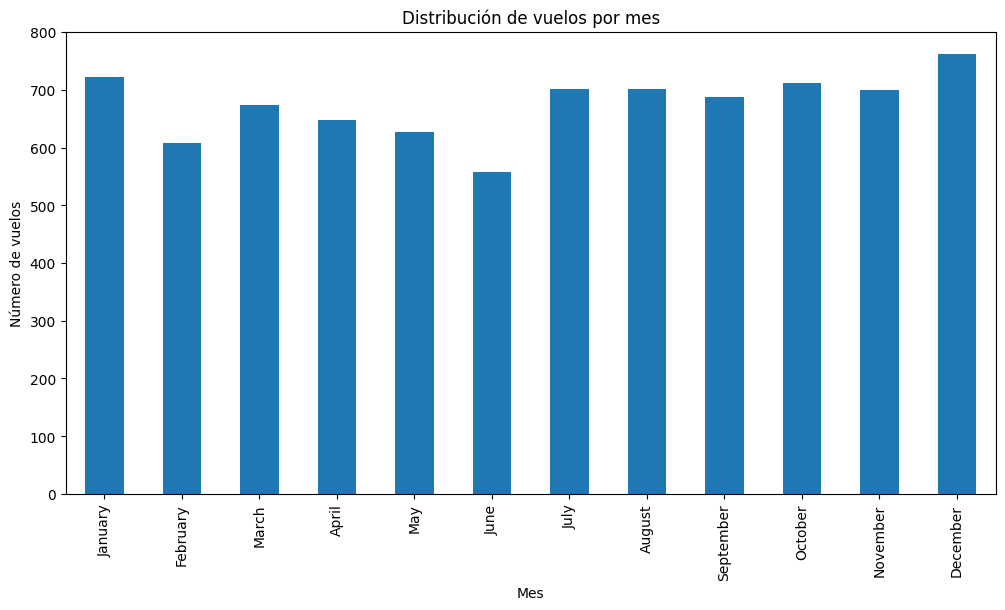

In [31]:
# Crea una lista ordenada de los nombres de los meses en inglés
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
          'December']

# Convierte 'Month Flown' en una variable categórica con un orden específico
datos['MesVuelo'] = pd.Categorical(datos['MesVuelo'], categories=months, ordered=True)

# Crea una agrupación por mes
vuelos_grouped = datos.groupby('MesVuelo', observed=True).size()

# Crea el gráfico de barras
vuelos_grouped.plot(kind='bar', figsize=(12, 6))

plt.title('Distribución de vuelos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de vuelos')

plt.show()